# Housing Analysis

In [73]:
pip install pywaffle

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd

In [75]:
data = pd.read_csv('data/spanish_houses.csv')
data.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,4,0,0,1,NaN,19147,328868,0.57,0.7,19889.0
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,3,1,0,0,NaN,19147,328868,0.57,0.7,19889.0
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,2,1,1,1,NaN,19147,328868,0.57,0.7,19889.0


## Process data

In [76]:
# Remove rows with mismatching values
data = data[data['ad_description']!='ad_description']
data.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,4,0,0,1,NaN,19147,328868,0.57,0.7,19889.0
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,3,1,0,0,NaN,19147,328868,0.57,0.7,19889.0
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,2,1,1,1,NaN,19147,328868,0.57,0.7,19889.0


In [77]:
# Cast to numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['m2_real'] = pd.to_numeric(data['m2_real'], errors='coerce')

In [78]:
# Create a new column for price per square meter
data['price_per_m2'] = data['price'] / data['m2_real']

### Location

In [79]:
# Crear nueva columna 'prov' con lo que aparece después de la coma
data['prov'] = data['loc_zone'].str.split(',').str[-1].str.strip()

In [80]:
top_provincias = data['prov'].value_counts()
print(top_provincias)

prov
Balears (Illes)           24822
Vizcaya                   23075
A Coruña                   8311
Guipúzcoa                  7678
Madrid                     5248
Sevilla                    5076
Albacete                   4454
Álava                      3928
Zamora                     3384
Alicante                   1944
Ciudad Real                1816
Girona                     1808
Segovia                    1526
València                   1401
Soria                      1370
Santa Cruz de Tenerife     1218
Barcelona                   885
Cádiz                       787
Huelva                      657
Tarragona                   219
Valladolid                  210
Name: count, dtype: int64


### House type

In [81]:
print(data['house_type'].value_counts())

house_type
Piso                                       53964
 Casa o chalet independiente               13592
 Casa o chalet                              6868
 Chalet adosado                             6441
Ático                                       3345
 Casa de pueblo                             3001
Dúplex                                      2577
 Chalet pareado                             2482
 Finca rústica                              2276
Alquiler de Piso                            2244
 Casa rural                                  963
Estudio                                      692
Casa rural                                   601
 Caserón                                     161
Alquiler de Ático                            101
 Masía                                       100
Alquiler de Dúplex                            72
 Casa terrera                                 69
Alquiler de Casa o chalet independiente       61
Alquiler de Chalet adosado                    54
 Cortijo 

In [82]:
def agrupar_house_type(ht):
    ht = ht.lower().strip()
    ht = ht.replace('alquiler de ', '')  # quitar "alquiler de"
    
    if any(x in ht for x in ['piso', 'ático', 'dúplex', 'estudio']):
        return 'Piso / Ático'
    elif any(x in ht for x in ['chalet', 'casa', 'casa de pueblo', 'caserón', 'terrera']):
        return 'Casa / Chalet'
    elif any(x in ht for x in ['rural', 'finca', 'masía', 'cortijo']):
        return 'Casa rural / rústica'
    elif any(x in ht for x in ['palacio', 'torre', 'castillo']):
        return 'Vivienda singular'
    else:
        return 'Otro'

# 1. Eliminar filas de alquiler (case insensitive)
data = data[~data['house_type'].str.lower().str.contains('alquiler', na=False)]

# data = data[data['house_type'].str.lower().str.contains('alquiler', na=False)]


# Aplicar al DataFrame
data['house_category'] = data['house_type'].apply(agrupar_house_type)

# Ver distribución
print(data['house_category'].value_counts())

house_category
Piso / Ático            60578
Casa / Chalet           34178
Casa rural / rústica     2406
Vivienda singular          44
Name: count, dtype: int64


In [83]:
from matplotlib.cm import get_cmap
from pywaffle import Waffle
import matplotlib.pyplot as plt
import os

def plot_and_save_waffles_all_provinces(df, output_dir='waffle_plots'):
    # Crear carpeta si no existe
    os.makedirs(output_dir, exist_ok=True)

    provincias = df['prov'].dropna().unique()

    for provincia in provincias:
        subset = df[df['prov'] == provincia]

        # Contar categorías
        counts = subset['house_category'].value_counts()
        total = counts.sum()
        if total == 0:
            continue  # Evitar errores con provincias vacías

        data_percent = (counts / total * 100).round().astype(int)
        diff = 100 - data_percent.sum()
        if diff != 0:
            data_percent[data_percent.idxmax()] += diff

        data = {cat: val for cat, val in data_percent.items()}
        cmap = get_cmap('Set2')
        colors = [cmap(i % 4) for i in range(len(data))]  # Evitar overflow

        fig = plt.figure(
            FigureClass=Waffle,
            rows=10,
            values=data,
            colors=colors,
            title={
                'label': '',
                'loc': 'center',
                'fontsize': 14
            },
            legend={
                'loc': 'lower left',
                'bbox_to_anchor': (0, -0.35),
                'fontsize': 9,
                'ncol': 2
            },
            figsize=(10, 6)
        )

        # Guardar gráfico
        filename = provincia.replace(" ", "_").replace("/", "-").lower() + ".png"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, dpi=600, bbox_inches='tight', transparent=True)
        plt.close(fig)

    print(f"✅ Waffle plots guardados en la carpeta: '{output_dir}'")

In [84]:
plot_and_save_waffles_all_provinces(data)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_44432/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_44432/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_44432/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')
/var/fo

✅ Waffle plots guardados en la carpeta: 'waffle_plots'


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_44432/4221008832.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('Set2')


In [85]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def create_waffle_grid_rotated_flipped_with_labels(image_dir='waffle_plots', grid_size=(3,7), output_path='grid.png'):
    # Obtener todos los .png en el directorio
    images = [file for file in os.listdir(image_dir) if file.endswith('.png')]
    images.sort()  # Orden alfabético

    rows, cols = grid_size
    num_images = min(len(images), rows * cols)

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axs = axs.flatten()

    for i in range(rows * cols):
        ax = axs[i]
        if i < num_images:
            img_path = os.path.join(image_dir, images[i])
            # Rotar 90° a la izquierda y reflejar horizontalmente
            img = Image.open(img_path).rotate(90, expand=True).transpose(Image.FLIP_LEFT_RIGHT)
            ax.imshow(img)
            ax.axis('off')

            # Nombre bonito debajo
            name = os.path.splitext(images[i])[0].replace('_', ' ').title()
            ax.set_title(name, fontsize=10, pad=5)
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.6)
    plt.savefig(output_path, dpi=600, bbox_inches='tight', transparent=True)
    plt.close(fig)
    print(f"✅ Grid guardado como '{output_path}' con fondo transparente")

# Ejecutar tras generar los PNGs individuales
create_waffle_grid_rotated_flipped_with_labels()


✅ Grid guardado como 'grid.png' con fondo transparente


## Visualization

In [86]:
print(data['price'].max())
print(data['price'].min())

23000000
1


In [87]:
# Calcular IQR y filtrar outliers por provincia
def remove_outliers_iqr(df, group_col, value_col):
    cleaned_df = pd.DataFrame()
    
    for prov, group in df.groupby(group_col):
        q1 = group[value_col].quantile(0.25)
        q3 = group[value_col].quantile(0.75)
        print(f"Provincia: {prov}, Q1: {q1}, Q3: {q3}")

        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        filtered = group[(group[value_col] >= lower) & (group[value_col] <= upper)]
        cleaned_df = pd.concat([cleaned_df, filtered])
    
    return cleaned_df

# Limpiar el DataFrame
data = remove_outliers_iqr(data, group_col='prov', value_col='price')


Provincia: A Coruña, Q1: 84000.0, Q3: 230000.0
Provincia: Albacete, Q1: 69900.0, Q3: 150000.0
Provincia: Alicante, Q1: 72375.0, Q3: 220000.0
Provincia: Balears (Illes), Q1: 247000.0, Q3: 840000.0
Provincia: Barcelona, Q1: 99000.0, Q3: 217000.0
Provincia: Ciudad Real, Q1: 47000.0, Q3: 109000.0
Provincia: Cádiz, Q1: 60000.0, Q3: 115000.0
Provincia: Girona, Q1: 119000.0, Q3: 256687.5
Provincia: Guipúzcoa, Q1: 160000.0, Q3: 430000.0
Provincia: Huelva, Q1: 52000.0, Q3: 126000.0
Provincia: Madrid, Q1: 159375.0, Q3: 440000.0
Provincia: Santa Cruz de Tenerife, Q1: 118250.0, Q3: 319000.0
Provincia: Segovia, Q1: 75000.0, Q3: 192509.5
Provincia: Sevilla, Q1: 88000.0, Q3: 218924.0
Provincia: Soria, Q1: 54000.0, Q3: 150000.0
Provincia: Tarragona, Q1: 180000.0, Q3: 341000.0
Provincia: Valladolid, Q1: 110250.0, Q3: 296050.0
Provincia: València, Q1: 69000.0, Q3: 195000.0
Provincia: Vizcaya, Q1: 169900.0, Q3: 425000.0
Provincia: Zamora, Q1: 57000.0, Q3: 144000.0
Provincia: Álava, Q1: 145000.0, Q3: 2980

In [88]:
print(data['price'].max())
print(data['price'].min())

1725000
1


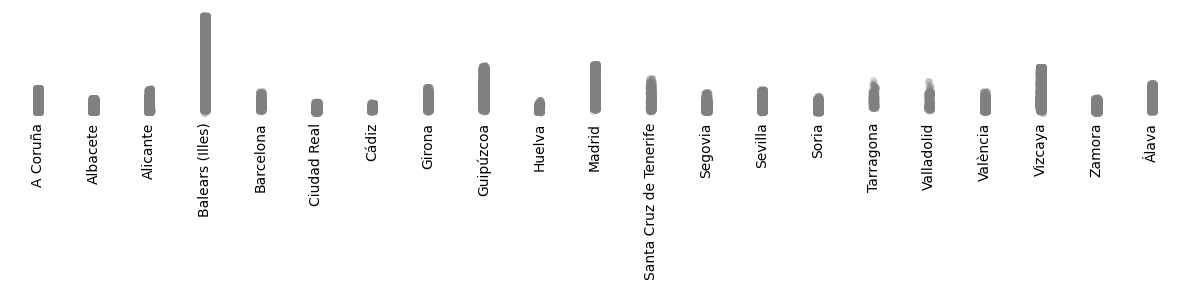

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
sns.stripplot(data=data, x='prov', y='price', jitter=0.04, color="grey", alpha=0.3, size=5)

# Quitar todos los spines (bordes)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Quitar ticks y etiquetas del eje Y
plt.yticks([])
plt.ylabel('')

# Quitar ticks del eje X, pero dejar las etiquetas de provincia
plt.tick_params(axis='x', which='both', length=0)

# Quitar título y eje X
plt.title('')
plt.xlabel('')

plt.xticks(rotation=90)
plt.tight_layout()

# Guardar imagen con fondo transparente
plt.savefig("images/precios_por_provincia.png", dpi=300, transparent=True)

plt.show()

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_44432/2421566024.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


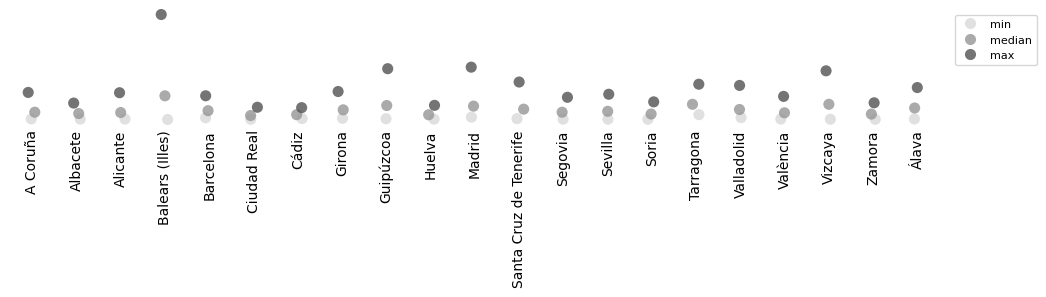

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que 'price' sea numérico
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data_clean = data.dropna(subset=['price'])

# Calcular min, max y median por provincia
summary = data_clean.groupby('prov')['price'].agg(['min', 'median', 'max']).reset_index()

# Convertir a formato largo para facilitar el stripplot
summary_long = summary.melt(id_vars='prov', var_name='stat', value_name='price')

# Plot
plt.figure(figsize=(12, 1.5))
sns.stripplot(data=summary_long, x='prov', y='price', hue='stat', jitter=True, alpha=0.8, size=8, palette='Greys')

# Estética
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.yticks([])
plt.ylabel('')
plt.tick_params(axis='x', which='both', length=0)
plt.title('')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(title='', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.savefig("images/precios_min_med_max_por_provincia.png", dpi=300, transparent=True)
plt.show()


<Axes: xlabel='prov', ylabel='price'>

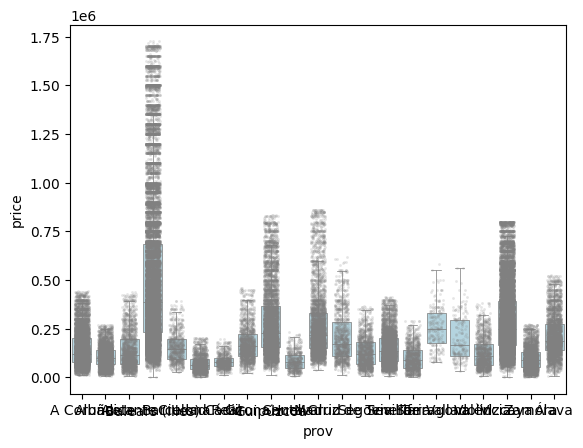

In [91]:
sns.boxplot(data=data, x='prov', y='price', fliersize=0, linewidth=0.5, color='lightblue')
sns.stripplot(data=data, x='prov', y='price', jitter=0.3, color='grey', alpha=0.2, size=2)


/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_44432/451526967.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


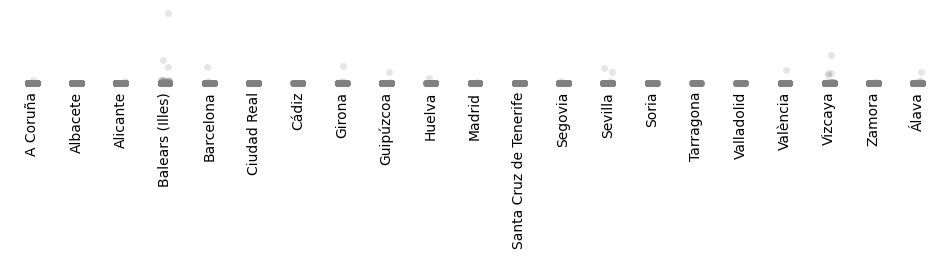

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 1))
sns.stripplot(data=data, x='prov', y='price_per_m2', jitter=True, color="grey", alpha=0.2)

# Quitar todos los spines (bordes)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Quitar ticks y etiquetas del eje Y
plt.yticks([])
plt.ylabel('')

# Quitar ticks del eje X, pero dejar las etiquetas de provincia
plt.tick_params(axis='x', which='both', length=0)

# Quitar título y eje X
plt.title('')
plt.xlabel('')

plt.xticks(rotation=90)
plt.tight_layout()

# Guardar imagen con fondo transparente
plt.savefig("images/precios_por_provincia.png", dpi=300, transparent=True)

plt.show()